 Titanic Dataset EDA Notebook
 Reference: https://www.kaggle.com/code/junaiddata35/titanic-dataset-exploratory-data-analysis-eda

In [1]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set styles
sns.set_style('whitegrid')
%matplotlib inline

In [6]:
# Load dataset directly from seaborn
df = sns.load_dataset('titanic')


In [7]:
# 3. Basic checks
print("Shape:", df.shape)
print("\nColumns:", df.columns)
print("\nFirst few rows:\n", df.head())

Shape: (891, 15)

Columns: Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

First few rows:
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton 

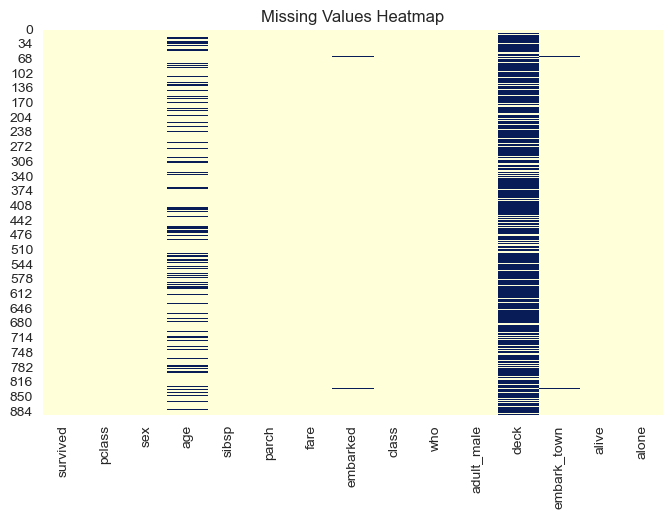

In [8]:
# 4. Missing values analysis
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, cmap='YlGnBu')
plt.title("Missing Values Heatmap")
plt.show()


In [9]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [10]:
# 5. Overall distribution of numeric features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumeric Columns:", numeric_cols)
print("\nDescriptive Statistics:\n", df[numeric_cols].describe().T)


Numeric Columns: Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')

Descriptive Statistics:
           count       mean        std   min      25%      50%   75%       max
survived  891.0   0.383838   0.486592  0.00   0.0000   0.0000   1.0    1.0000
pclass    891.0   2.308642   0.836071  1.00   2.0000   3.0000   3.0    3.0000
age       714.0  29.699118  14.526497  0.42  20.1250  28.0000  38.0   80.0000
sibsp     891.0   0.523008   1.102743  0.00   0.0000   0.0000   1.0    8.0000
parch     891.0   0.381594   0.806057  0.00   0.0000   0.0000   0.0    6.0000
fare      891.0  32.204208  49.693429  0.00   7.9104  14.4542  31.0  512.3292


C:\Users\Yashwanth\AppData\Local\Temp\ipykernel_2100\1267444188.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df, palette='Set2')


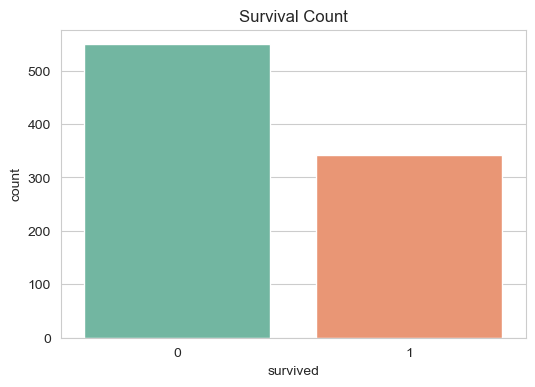

In [11]:
# 6. Explore target variable
plt.figure(figsize=(6,4))
sns.countplot(x='survived', data=df, palette='Set2')
plt.title("Survival Count")
plt.show()

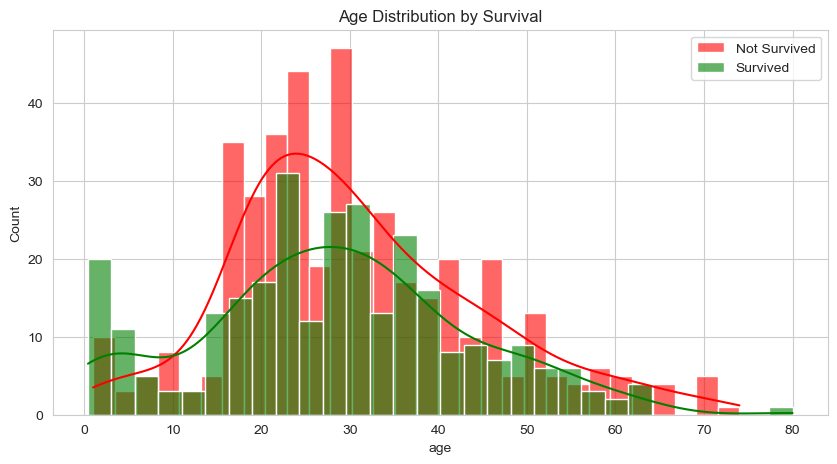

In [12]:
# 7. Age distribution and survival overlay
plt.figure(figsize=(10,5))
sns.histplot(df[df['survived']==0]['age'], bins=30, color='red', label='Not Survived', kde=True, alpha=0.6)
sns.histplot(df[df['survived']==1]['age'], bins=30, color='green', label='Survived', kde=True, alpha=0.6)
plt.legend()
plt.title("Age Distribution by Survival")
plt.show()

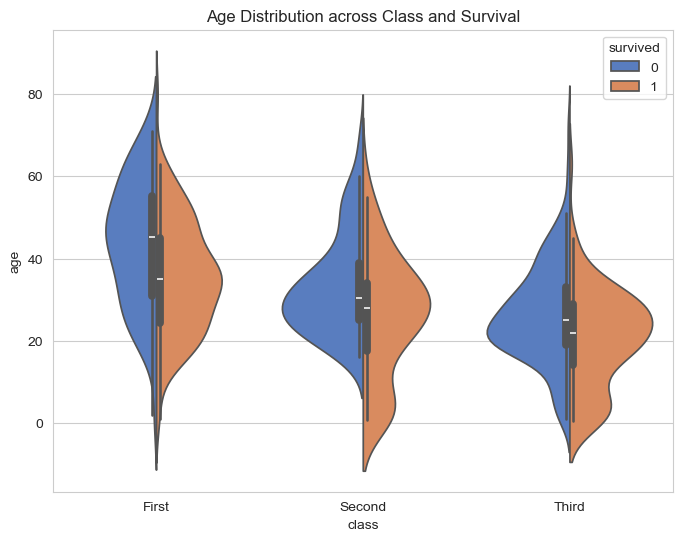

In [13]:
# 8. Violin plot of age and class with survival hue
plt.figure(figsize=(8,6))
sns.violinplot(x='class', y='age', hue='survived', data=df, split=True, palette='muted')
plt.title("Age Distribution across Class and Survival")
plt.show()

C:\Users\Yashwanth\AppData\Local\Temp\ipykernel_2100\2998862165.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='fare', data=df, palette='coolwarm')
C:\Users\Yashwanth\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Yashwanth\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 55.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Yashwanth\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 77.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)

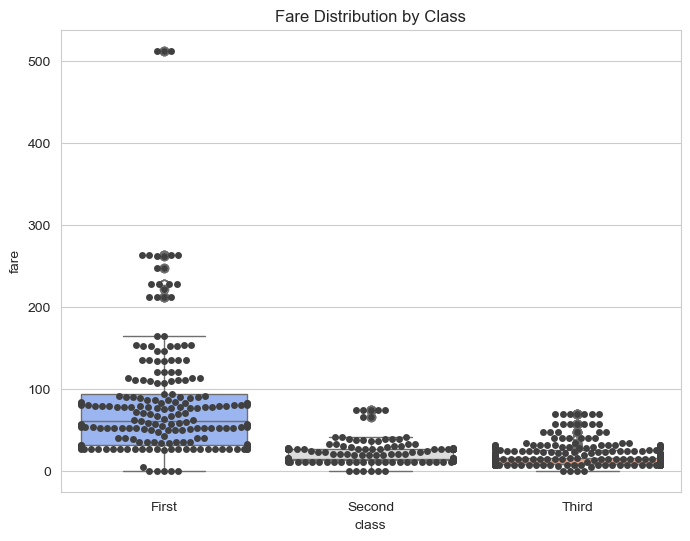

In [14]:
# 9. Fare analysis: Boxplot + swarmplot
plt.figure(figsize=(8,6))
sns.boxplot(x='class', y='fare', data=df, palette='coolwarm')
sns.swarmplot(x='class', y='fare', data=df, color='.25')
plt.title("Fare Distribution by Class")
plt.show()

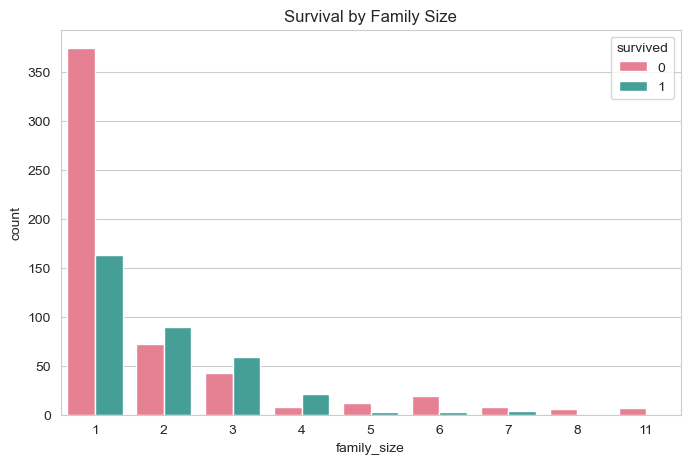

In [15]:
# 10. Feature interaction: Family size
df['family_size'] = df['sibsp'] + df['parch'] + 1
plt.figure(figsize=(8,5))
sns.countplot(x='family_size', hue='survived', data=df, palette='husl')
plt.title("Survival by Family Size")
plt.show()


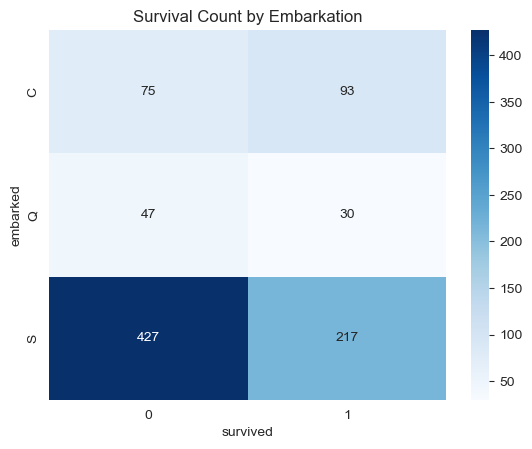

In [16]:
# 11. Embarked and survival heatmap
embarked_survival = pd.crosstab(df['embarked'], df['survived'])
sns.heatmap(embarked_survival, annot=True, cmap='Blues', fmt='d')
plt.title("Survival Count by Embarkation")
plt.show()

In [19]:
# 15. Summary insights
print("\nKey Insights:")
print("1️⃣ Younger passengers had higher survival rates, especially in 1st and 2nd classes.")
print("2️⃣ Higher fares were associated with higher survival, but with some outliers.")
print("3️⃣ Family size shows interesting patterns; survival decreases with large families (>4).")
print("4️⃣ Embarked port 'C' had better survival rates compared to 'S' and 'Q'.")
print("5️⃣ Correlation heatmap shows survival is strongly linked with fare and class.")



Key Insights:
1️⃣ Younger passengers had higher survival rates, especially in 1st and 2nd classes.
2️⃣ Higher fares were associated with higher survival, but with some outliers.
3️⃣ Family size shows interesting patterns; survival decreases with large families (>4).
4️⃣ Embarked port 'C' had better survival rates compared to 'S' and 'Q'.
5️⃣ Correlation heatmap shows survival is strongly linked with fare and class.
